In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [15]:
data = pd.read_csv("/kaggle/input/diabatess/diabetes.csv")

In [16]:
print(data.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [17]:
X = data.drop(columns='Outcome').values
y = data['Outcome'].values

In [18]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [21]:
def cross_entropy_loss(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

In [22]:
def train(X, y, lr=0.01, epochs=1000):
    m, n = X.shape
    weights = np.zeros(n)
    bias = 0
    loss_history = []

    for epoch in range(epochs):
        z = np.dot(X, weights) + bias
        y_pred = sigmoid(z)

        loss = cross_entropy_loss(y, y_pred)
        loss_history.append(loss)

        dw = (1/m) * np.dot(X.T, (y_pred - y))
        db = (1/m) * np.sum(y_pred - y)

        weights -= lr * dw
        bias -= lr * db

    return weights, bias, loss_history


In [23]:
weights, bias, loss_history = train(X_train, y_train, lr=0.01, epochs=1000)

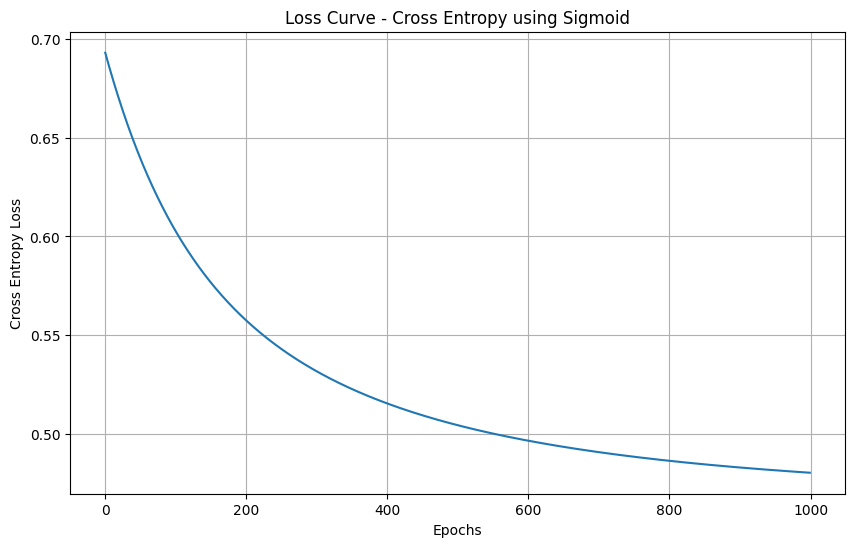

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(loss_history)
plt.title('Loss Curve - Cross Entropy using Sigmoid')
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.grid(True)
plt.show()

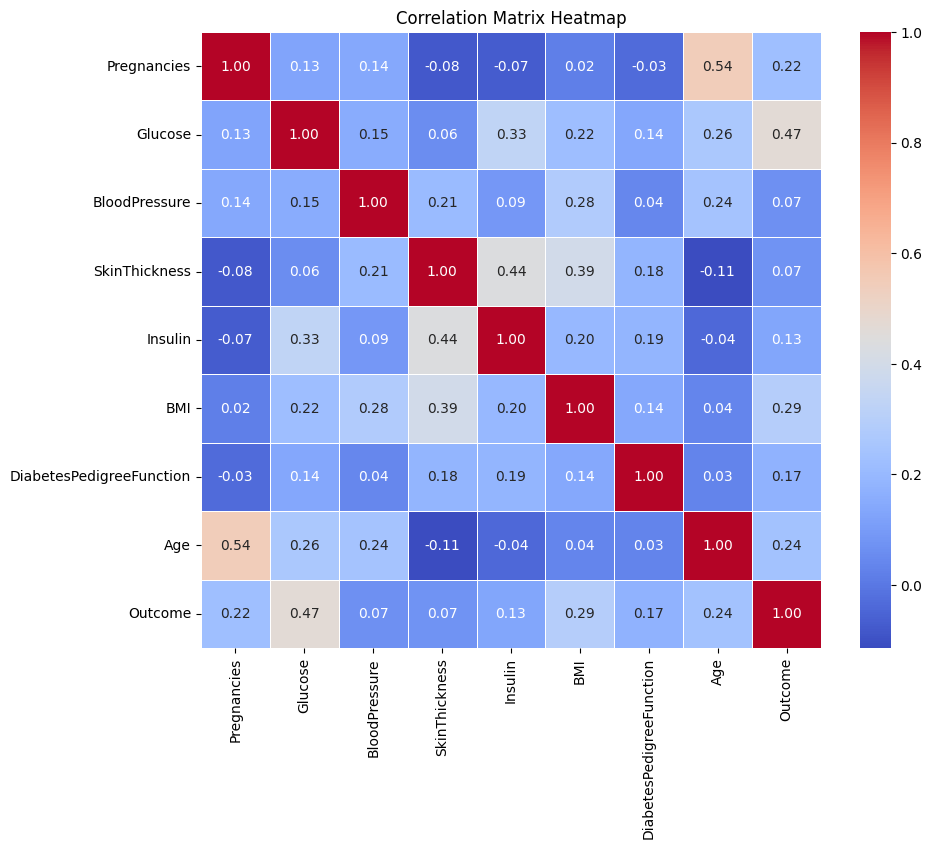

In [27]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()